In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [99]:
bench_ligne=pd.read_csv('data/raw/bench_lignes.csv',)
caracteristique_part=pd.read_csv('data/raw/caracteristiques_parts.csv')
fixing=pd.read_csv('data/raw/fixing.csv')
frais=pd.read_csv('data/raw/frais.csv')
taux_historique=pd.read_csv('data/raw/historique_taux.csv')
passif_annee_2=pd.read_csv('data/raw/passif_annee_2_albert_school.csv')
perf_bench=pd.read_csv('data/raw/perf_bench.csv')
perf_fond=pd.read_csv('data/raw/perf_fonds.csv')
position_euro_high_yield=pd.read_csv('data/raw/positions_eurohighyield.csv')
usgg10_year_index=pd.read_csv('data/raw/usgg10yr_index.csv')
passif_yield=pd.read_csv('data/processed/passif_EHY.csv')
bench_yield=pd.read_csv('data/processed/bench_lignes_EHY.csv')
caracteristique_yield=pd.read_csv('data/processed/caracteristiques_parts_EHY.csv')

/var/folders/2z/ttggt_bd7tz3zlwq71t2r3m80000gn/T/ipykernel_39081/2652911692.py:9: DtypeWarning: Columns (0,1,2,4,5,6,7,8,9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  position_euro_high_yield=pd.read_csv('data/raw/positions_eurohighyield.csv')


In [100]:
# Vérification des types de colonnes
print(passif_yield.dtypes)

# Convertir les colonnes en types appropriés
passif_yield['Net Inflows MTD (€)'] = pd.to_numeric(passif_yield['Net Inflows MTD (€)'], errors='coerce')
passif_yield['Net Inflows YTD (€)'] = pd.to_numeric(passif_yield['Net Inflows YTD (€)'], errors='coerce')
passif_yield['AUM (€)'] = pd.to_numeric(passif_yield['AUM (€)'], errors='coerce')
passif_yield['Date'] = pd.to_datetime(passif_yield['Date'], errors='coerce')

# Vérification des valeurs manquantes
print(passif_yield.isnull().sum())

Owner                                                                               object
Business Relationship                                                               object
Fund                                                                                object
Share                                                                               object
Share Type                                                                          object
ISIN                                                                                object
Date                                                                                object
AUM (€)                                                                            float64
Quantity                                                                             int64
Net Inflows YTD (€)                                                                  int64
Net Inflows MTD (€)                                                                  int64

In [101]:
passif_yield

,Owner,Business Relationship,Fund,Share,Share Type,ISIN,Date,AUM (€),Quantity,Net Inflows YTD (€),Net Inflows MTD (€),Master Distributor / Fund Buyer (Business Relationship) (Business Relationship),BR Segmentation (Business Relationship) (Business Relationship),Reporting Line (Business Relationship) (Business Relationship),Business Country (Business Relationship) (Business Relationship),Asset Class (Fund) (EdRAM Product),Sub Asset Class (Fund) (EdRAM Product)
0,PBIA (Suisse),EDR MONACO / Managed,EdR Fund Euro High Yield,EdR Fund Euro High Yield A - EUR,A,LU1160363633,2024-09-30 06:00:00,62734961.0,150711,1364232,359649,EDMOND DE ROTHSCHILD (MONACO),Bank / EdR Private Banking,EdR Private Banking,MONACO,Fixed Income,Corporate Debt (excl. Emerging)
1,Nicolas BONARDO,GENERALI VIE (DISTRIBUTION),EdR Fund Euro High Yield,EdR Fund Euro High Yield A - EUR,A,LU1160363633,2024-09-30 06:00:00,27065923.0,65022,-866516,-9258,GENERALI VIE,Insurance Company / Unit Link,Wholesale,FRANCE,Fixed Income,Corporate Debt (excl. Emerging)
2,IFA Partenariat Team France,GENERALI VIE (CGPI),EdR Fund Euro High Yield,EdR Fund Euro High Yield A - EUR,A,LU1160363633,2024-09-30 06:00:00,14573959.0,35012,-466586,-4985,GENERALI VIE,Insurance Company / Unit Link,IFA,FRANCE,Fixed Income,Corporate Debt (excl. Emerging)
3,IFA Partenariat Team France,AXA FRANCE (CGPI),EdR Fund Euro High Yield,EdR Fund Euro High Yield A - EUR,A,LU1160363633,2024-09-30 06:00:00,11547196.0,27740,3363894,198734,MFEX FRANCE S.A. (EX. AXELTIS),Insurance Company / Unit Link,IFA,FRANCE,Fixed Income,Corporate Debt (excl. Emerging)
4,PBIA,EDR ITALIA PB/ALLFUNDS/Managed,EdR Fund Euro High Yield,EdR Fund Euro High Yield I - EUR,I,LU1160362742,2024-09-30 06:00:00,10597972.0,537,-1348740,-27036,"ALLFUNDS BANK, S.A.U",Bank / EdR Private Banking,EdR Private Banking,ITALY,Fixed Income,Corporate Debt (excl. Emerging)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8005,Olivier BRUTE DE REMUR,CIC-EST (CAISSE FEDERALE DE CREDIT MUTUEL),EdR Fund Euro High Yield,EdR Fund Euro High Yield A - EUR,A,LU1160363633,2020-09-30 06:00:00,-735.0,-2,0,0,BANQUE FEDERATIVE DU CREDIT MUTUEL,Bank / Retail,Wholesale,FRANCE,Fixed Income,Corporate Debt (excl. Emerging)
8006,PBIA (Suisse),EDR SUISSE - CUSTODIAN,EdR Fund Euro High Yield,EdR Fund Euro High Yield B - EUR,B,LU1160363047,2020-09-30 06:00:00,-67626.0,-650,-67256,-67256,NaN,Bank / EdR Private Banking,EdR Private Banking,SWITZERLAND,Fixed Income,Corporate Debt (excl. Emerging)
8007,Edmond de Rothschild Asset Management,CLIENT INCONNU,EdR Fund Euro High Yield,EdR Fund Euro High Yield A - EUR,A,LU1160363633,2020-09-30 06:00:00,-254866.0,-693,0,0,NaN,Unknown,Unknown,UNKNOWN,Fixed Income,Corporate Debt (excl. Emerging)
8008,Edmond de Rothschild Asset Management,CLIENT INCONNU,EdR Fund Euro High Yield,EdR Fund Euro High Yield I - EUR,I,LU1160362742,2020-09-30 06:00:00,-1107146.0,-65,0,0,NaN,Unknown,Unknown,UNKNOWN,Fixed Income,Corporate Debt (excl. Emerging)


In [102]:
passif_yield['Business Relationship'].value_counts()

Business Relationship
EDRAM FUNDS                                                     221
EDR MONACO / Not Managed                                        177
CLIENT INCONNU                                                  154
LA MONDIALE EUROPARTNER (ex LA HENIN VIE ET LA MONDIALE LUX)    147
EDRAM FONDS PROPRES (Luxembourg)                                144
                                                               ... 
MYRIA AM                                                          4
AFI-ESCA / FUND CHANNEL                                           3
FINANCE SA                                                        3
EDR SUISSE, SUCCURSALE DE LUGANO / Advisory                       3
EDOUARD 7 GESTION PRIVEE                                          3
Name: count, Length: 208, dtype: int64

In [103]:
# Suppression des lignes avec des dates ou flux manquants
passif_yield_cleaned = passif_yield.dropna(subset=['Date', 'Net Inflows MTD (€)', 'Net Inflows YTD (€)'])

In [104]:
# Ajouter des colonnes 'Year', 'Quarter', et 'Semester'
passif_yield_cleaned['Year'] = passif_yield_cleaned['Date'].dt.year
passif_yield_cleaned['Quarter'] = passif_yield_cleaned['Date'].dt.to_period('Q')
passif_yield_cleaned['Semester'] = passif_yield_cleaned['Date'].dt.to_period('6M')

In [105]:
# Créer une fonction pour catégoriser les segments
def categorize_segment(segment):
    if 'Bank' in segment:
        return 'Bank'
    elif 'Insurance' in segment:
        return 'Insurance'
    elif 'AM company' in segment:
        return 'AM company'
    elif 'Pension Fund' in segment:
        return 'Pension Fund'
    elif 'Financial Advisor' in segment:
        return 'Financial Advisor'
    elif 'Single Family Office' in segment:
        return 'Single Family Office'
    elif 'Consultant' in segment:
        return 'Consultant'
    else:
        return 'Other'

# Appliquer la fonction à la colonne BR Segmentation
passif_yield_cleaned['Segment_Type'] = passif_yield_cleaned['BR Segmentation (Business Relationship) (Business Relationship)'].apply(categorize_segment)

# Vérifier les nouvelles catégories
print(passif_yield_cleaned['Segment_Type'].value_counts())

Segment_Type
Bank                    4837
Insurance               1541
AM company              1103
Financial Advisor        271
Other                    167
Pension Fund              48
Single Family Office      39
Consultant                 4
Name: count, dtype: int64


In [106]:
passif_yield_cleaned

,Owner,Business Relationship,Fund,Share,Share Type,ISIN,Date,AUM (€),Quantity,Net Inflows YTD (€),...,Master Distributor / Fund Buyer (Business Relationship) (Business Relationship),BR Segmentation (Business Relationship) (Business Relationship),Reporting Line (Business Relationship) (Business Relationship),Business Country (Business Relationship) (Business Relationship),Asset Class (Fund) (EdRAM Product),Sub Asset Class (Fund) (EdRAM Product),Year,Quarter,Semester,Segment_Type
0,PBIA (Suisse),EDR MONACO / Managed,EdR Fund Euro High Yield,EdR Fund Euro High Yield A - EUR,A,LU1160363633,2024-09-30 06:00:00,62734961.0,150711,1364232,...,EDMOND DE ROTHSCHILD (MONACO),Bank / EdR Private Banking,EdR Private Banking,MONACO,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q3,2024-09,Bank
1,Nicolas BONARDO,GENERALI VIE (DISTRIBUTION),EdR Fund Euro High Yield,EdR Fund Euro High Yield A - EUR,A,LU1160363633,2024-09-30 06:00:00,27065923.0,65022,-866516,...,GENERALI VIE,Insurance Company / Unit Link,Wholesale,FRANCE,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q3,2024-09,Insurance
2,IFA Partenariat Team France,GENERALI VIE (CGPI),EdR Fund Euro High Yield,EdR Fund Euro High Yield A - EUR,A,LU1160363633,2024-09-30 06:00:00,14573959.0,35012,-466586,...,GENERALI VIE,Insurance Company / Unit Link,IFA,FRANCE,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q3,2024-09,Insurance
3,IFA Partenariat Team France,AXA FRANCE (CGPI),EdR Fund Euro High Yield,EdR Fund Euro High Yield A - EUR,A,LU1160363633,2024-09-30 06:00:00,11547196.0,27740,3363894,...,MFEX FRANCE S.A. (EX. AXELTIS),Insurance Company / Unit Link,IFA,FRANCE,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q3,2024-09,Insurance
4,PBIA,EDR ITALIA PB/ALLFUNDS/Managed,EdR Fund Euro High Yield,EdR Fund Euro High Yield I - EUR,I,LU1160362742,2024-09-30 06:00:00,10597972.0,537,-1348740,...,"ALLFUNDS BANK, S.A.U",Bank / EdR Private Banking,EdR Private Banking,ITALY,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q3,2024-09,Bank
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8005,Olivier BRUTE DE REMUR,CIC-EST (CAISSE FEDERALE DE CREDIT MUTUEL),EdR Fund Euro High Yield,EdR Fund Euro High Yield A - EUR,A,LU1160363633,2020-09-30 06:00:00,-735.0,-2,0,...,BANQUE FEDERATIVE DU CREDIT MUTUEL,Bank / Retail,Wholesale,FRANCE,Fixed Income,Corporate Debt (excl. Emerging),2020,2020Q3,2020-09,Bank
8006,PBIA (Suisse),EDR SUISSE - CUSTODIAN,EdR Fund Euro High Yield,EdR Fund Euro High Yield B - EUR,B,LU1160363047,2020-09-30 06:00:00,-67626.0,-650,-67256,...,NaN,Bank / EdR Private Banking,EdR Private Banking,SWITZERLAND,Fixed Income,Corporate Debt (excl. Emerging),2020,2020Q3,2020-09,Bank
8007,Edmond de Rothschild Asset Management,CLIENT INCONNU,EdR Fund Euro High Yield,EdR Fund Euro High Yield A - EUR,A,LU1160363633,2020-09-30 06:00:00,-254866.0,-693,0,...,NaN,Unknown,Unknown,UNKNOWN,Fixed Income,Corporate Debt (excl. Emerging),2020,2020Q3,2020-09,Other
8008,Edmond de Rothschild Asset Management,CLIENT INCONNU,EdR Fund Euro High Yield,EdR Fund Euro High Yield I - EUR,I,LU1160362742,2020-09-30 06:00:00,-1107146.0,-65,0,...,NaN,Unknown,Unknown,UNKNOWN,Fixed Income,Corporate Debt (excl. Emerging),2020,2020Q3,2020-09,Other


In [107]:
passif_yield_cleaned[passif_yield_cleaned['Business Country (Business Relationship) (Business Relationship)']=='FRANCE']['Share Type'].value_counts()

Share Type
A     2926
CR     258
J      151
R      138
I      109
N       55
B       10
Name: count, dtype: int64

In [108]:
passif_yield_cleaned[passif_yield_cleaned['Segment_Type']=='Bank']['Share Type'].value_counts()

Share Type
A     3465
B      583
I      254
J      243
CR     208
R       53
N       16
O        6
K        6
Name: count, dtype: int64

In [109]:
passif_yield_cleaned[passif_yield_cleaned['Segment_Type']=='Insurance']['Share Type'].value_counts()

Share Type
A     1252
R      138
I       63
CR      49
N       39
Name: count, dtype: int64

In [110]:
passif_yield_cleaned[passif_yield_cleaned['Segment_Type']=='AM company']['Share Type'].value_counts()

Share Type
A     495
I     198
CR    155
K      85
N      68
J      49
O      49
Name: count, dtype: int64

In [111]:
clients = pd.DataFrame(passif_yield_cleaned['Segment_Type'].value_counts().reset_index())
clients

,Segment_Type,count
0,Bank,4837
1,Insurance,1541
2,AM company,1103
3,Financial Advisor,271
4,Other,167
5,Pension Fund,48
6,Single Family Office,39
7,Consultant,4


In [112]:
threshold = 1000
clients['Segment_Type'] = clients['Segment_Type'].where(clients['count'] >= threshold, 'Other')

clients = clients.groupby('Segment_Type', as_index=False).sum()

clients

,Segment_Type,count
0,AM company,1103
1,Bank,4837
2,Insurance,1541
3,Other,529


([<matplotlib.patches.Wedge at 0x14aa43ec0>,
 [Text(-0.46116234650844756, 0.9986637523024569, 'AM company'),
  Text(-0.40726237102855095, -1.0218303974457812, 'Bank'),
  Text(0.9369445295540706, 0.5763115030421495, 'Insurance'),
  Text(0.22659210975660893, 1.07640885159685, 'Other')],
 [Text(-0.25154309809551684, 0.5447256830740673, '13.8%'),
  Text(-0.22214311147011867, -0.557362034970426, '60.4%'),
  Text(0.5110606524840384, 0.3143517289320815, '19.2%'),
  Text(0.12359569623087759, 0.587132100871009, '6.6%')])

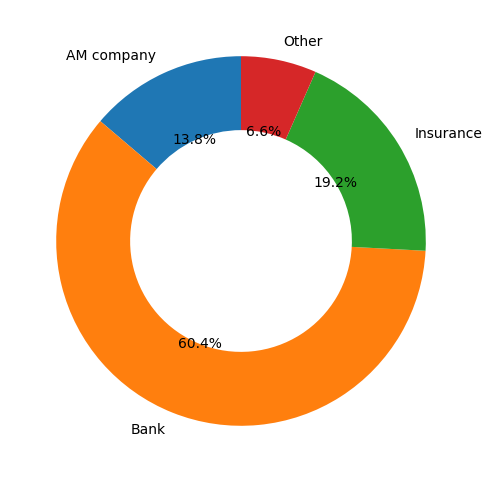

In [113]:
fig, ax = plt.subplots(figsize=(6, 6))

# Ajouter un cercle vide au centre pour créer l'effet d'anneau
ax.pie(clients['count'], labels=clients['Segment_Type'], autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})


In [114]:
pays_bank = pd.DataFrame(passif_yield_cleaned[passif_yield_cleaned['Segment_Type']=='Bank']['Business Country (Business Relationship) (Business Relationship)'].value_counts().reset_index())
pays_bank

,Business Country (Business Relationship) (Business Relationship),count
0,FRANCE,1765
1,SWITZERLAND,1120
2,MONACO,575
3,LUXEMBOURG,535
4,ITALY,244
5,PORTUGAL,161
6,BELGIUM,123
7,SPAIN,118
8,ISRAEL,106
9,GERMANY,74


([<matplotlib.patches.Wedge at 0x2979e3f20>,
 [Text(-1.0023951163730376, 0.45299451505673277, 'FRANCE'),
  Text(-0.13327195487472449, -1.0918967836035922, 'SWITZERLAND'),
  Text(0.9132001745017758, -0.6132417478367943, 'MONACO'),
  Text(1.090778798893503, 0.14213237451209848, 'LUXEMBOURG'),
  Text(0.885234053816239, 0.652962992798266, 'ITALY'),
  Text(0.685000594409588, 0.8606823953459901, 'PORTUGAL'),
  Text(0.5155211890934951, 0.9717190456071287, 'BELGIUM'),
  Text(0.35773828357019083, 1.0402034995462446, 'SPAIN'),
  Text(0.20315633488058288, 1.0810770109469023, 'ISRAEL'),
  Text(0.0756711902231686, 1.0973941274538557, 'GERMANY'),
  Text(0.011430306153466139, 1.0999406111700933, 'AUSTRIA')],
 [Text(-0.5467609725671113, 0.24708791730367238, '36.5%'),
  Text(-0.07269379356803153, -0.5955800637837775, '23.2%'),
  Text(0.49810918609187765, -0.3344954988200696, '11.9%'),
  Text(0.5949702539419106, 0.0775267497338719, '11.1%'),
  Text(0.4828549384452212, 0.35616163243541776, '5.0%'),
  Tex

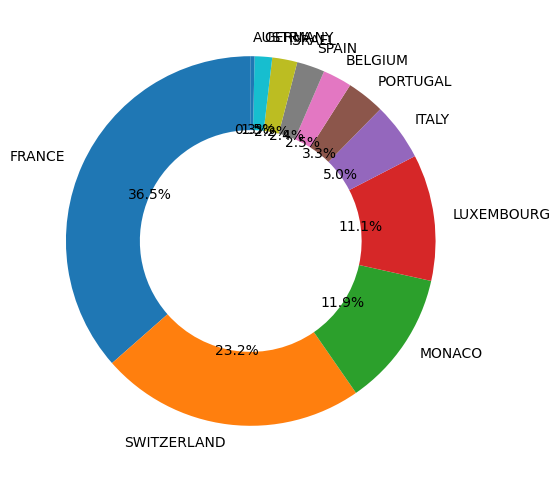

In [115]:
fig, ax = plt.subplots(figsize=(6, 6))

# Ajouter un cercle vide au centre pour créer l'effet d'anneau
ax.pie(pays_bank['count'], labels=pays_bank['Business Country (Business Relationship) (Business Relationship)'], autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})


In [116]:
pays_insurance = pd.DataFrame(passif_yield_cleaned[passif_yield_cleaned['Segment_Type']=='Insurance']['Business Country (Business Relationship) (Business Relationship)'].value_counts().reset_index())
pays_insurance

,Business Country (Business Relationship) (Business Relationship),count
0,FRANCE,1275
1,LUXEMBOURG,266


([<matplotlib.patches.Wedge at 0x2b457df10>,
 [Text(-0.5677052673618919, -0.9421840209903599, 'FRANCE'),
  Text(0.5677049603593398, 0.9421842059721658, 'LUXEMBOURG')],
 [Text(-0.30965741856103185, -0.5139185569038326, '82.7%'),
  Text(0.3096572511050944, 0.5139186578029995, '17.3%')])

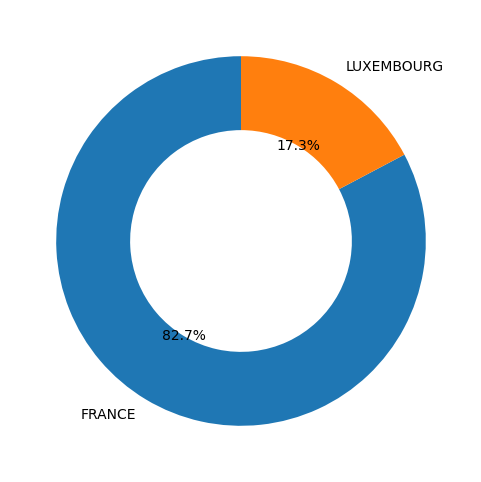

In [117]:
fig, ax = plt.subplots(figsize=(6, 6))

# Ajouter un cercle vide au centre pour créer l'effet d'anneau
ax.pie(pays_insurance['count'], labels=pays_insurance['Business Country (Business Relationship) (Business Relationship)'], autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})


In [118]:
pays_amcompany = pd.DataFrame(passif_yield_cleaned[passif_yield_cleaned['Segment_Type']=='AM company']['Business Country (Business Relationship) (Business Relationship)'].value_counts().reset_index())
pays_amcompany

,Business Country (Business Relationship) (Business Relationship),count
0,FRANCE,578
1,WORLD,221
2,LUXEMBOURG,208
3,ITALY,76
4,MONACO,12
5,SWITZERLAND,8


([<matplotlib.patches.Wedge at 0x2b45d84d0>,
 [Text(-1.096868162938935, -0.08294717072309588, 'FRANCE'),
  Text(0.7739307630810892, -0.7816848303227607, 'WORLD'),
  Text(0.9991706696119053, 0.46006300980115444, 'LUXEMBOURG'),
  Text(0.35685774190577285, 1.040505911584318, 'ITALY'),
  Text(0.08763225956971818, 1.09650380167271, 'MONACO'),
  Text(0.02506273850969462, 1.0997144443619875, 'SWITZERLAND')],
 [Text(-0.598291725239419, -0.045243911303506835, '52.4%'),
  Text(0.42214405258968496, -0.42637354381241493, '20.0%'),
  Text(0.5450021834246755, 0.25094345989153877, '18.9%'),
  Text(0.1946496774031488, 0.5675486790459916, '6.9%'),
  Text(0.04779941431075537, 0.598092982730569, '1.1%'),
  Text(0.013670584641651612, 0.5998442423792658, '0.7%')])

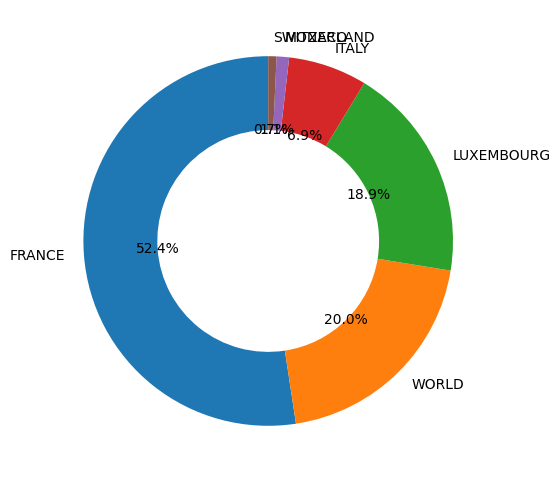

In [119]:
fig, ax = plt.subplots(figsize=(6, 6))

# Ajouter un cercle vide au centre pour créer l'effet d'anneau
ax.pie(pays_amcompany['count'], labels=pays_amcompany['Business Country (Business Relationship) (Business Relationship)'], autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})


In [120]:
passif_yield_cleaned

,Owner,Business Relationship,Fund,Share,Share Type,ISIN,Date,AUM (€),Quantity,Net Inflows YTD (€),...,Master Distributor / Fund Buyer (Business Relationship) (Business Relationship),BR Segmentation (Business Relationship) (Business Relationship),Reporting Line (Business Relationship) (Business Relationship),Business Country (Business Relationship) (Business Relationship),Asset Class (Fund) (EdRAM Product),Sub Asset Class (Fund) (EdRAM Product),Year,Quarter,Semester,Segment_Type
0,PBIA (Suisse),EDR MONACO / Managed,EdR Fund Euro High Yield,EdR Fund Euro High Yield A - EUR,A,LU1160363633,2024-09-30 06:00:00,62734961.0,150711,1364232,...,EDMOND DE ROTHSCHILD (MONACO),Bank / EdR Private Banking,EdR Private Banking,MONACO,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q3,2024-09,Bank
1,Nicolas BONARDO,GENERALI VIE (DISTRIBUTION),EdR Fund Euro High Yield,EdR Fund Euro High Yield A - EUR,A,LU1160363633,2024-09-30 06:00:00,27065923.0,65022,-866516,...,GENERALI VIE,Insurance Company / Unit Link,Wholesale,FRANCE,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q3,2024-09,Insurance
2,IFA Partenariat Team France,GENERALI VIE (CGPI),EdR Fund Euro High Yield,EdR Fund Euro High Yield A - EUR,A,LU1160363633,2024-09-30 06:00:00,14573959.0,35012,-466586,...,GENERALI VIE,Insurance Company / Unit Link,IFA,FRANCE,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q3,2024-09,Insurance
3,IFA Partenariat Team France,AXA FRANCE (CGPI),EdR Fund Euro High Yield,EdR Fund Euro High Yield A - EUR,A,LU1160363633,2024-09-30 06:00:00,11547196.0,27740,3363894,...,MFEX FRANCE S.A. (EX. AXELTIS),Insurance Company / Unit Link,IFA,FRANCE,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q3,2024-09,Insurance
4,PBIA,EDR ITALIA PB/ALLFUNDS/Managed,EdR Fund Euro High Yield,EdR Fund Euro High Yield I - EUR,I,LU1160362742,2024-09-30 06:00:00,10597972.0,537,-1348740,...,"ALLFUNDS BANK, S.A.U",Bank / EdR Private Banking,EdR Private Banking,ITALY,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q3,2024-09,Bank
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8005,Olivier BRUTE DE REMUR,CIC-EST (CAISSE FEDERALE DE CREDIT MUTUEL),EdR Fund Euro High Yield,EdR Fund Euro High Yield A - EUR,A,LU1160363633,2020-09-30 06:00:00,-735.0,-2,0,...,BANQUE FEDERATIVE DU CREDIT MUTUEL,Bank / Retail,Wholesale,FRANCE,Fixed Income,Corporate Debt (excl. Emerging),2020,2020Q3,2020-09,Bank
8006,PBIA (Suisse),EDR SUISSE - CUSTODIAN,EdR Fund Euro High Yield,EdR Fund Euro High Yield B - EUR,B,LU1160363047,2020-09-30 06:00:00,-67626.0,-650,-67256,...,NaN,Bank / EdR Private Banking,EdR Private Banking,SWITZERLAND,Fixed Income,Corporate Debt (excl. Emerging),2020,2020Q3,2020-09,Bank
8007,Edmond de Rothschild Asset Management,CLIENT INCONNU,EdR Fund Euro High Yield,EdR Fund Euro High Yield A - EUR,A,LU1160363633,2020-09-30 06:00:00,-254866.0,-693,0,...,NaN,Unknown,Unknown,UNKNOWN,Fixed Income,Corporate Debt (excl. Emerging),2020,2020Q3,2020-09,Other
8008,Edmond de Rothschild Asset Management,CLIENT INCONNU,EdR Fund Euro High Yield,EdR Fund Euro High Yield I - EUR,I,LU1160362742,2020-09-30 06:00:00,-1107146.0,-65,0,...,NaN,Unknown,Unknown,UNKNOWN,Fixed Income,Corporate Debt (excl. Emerging),2020,2020Q3,2020-09,Other


### exemple concret et poussé de segmentation

In [121]:
ex = passif_yield_cleaned[passif_yield_cleaned['Segment_Type']=='Bank']
ex = ex[ex['Business Country (Business Relationship) (Business Relationship)']=='ITALY']
ex = ex[ex['Share']=='EdR Fund Euro High Yield I - EUR']
ex

,Owner,Business Relationship,Fund,Share,Share Type,ISIN,Date,AUM (€),Quantity,Net Inflows YTD (€),...,Master Distributor / Fund Buyer (Business Relationship) (Business Relationship),BR Segmentation (Business Relationship) (Business Relationship),Reporting Line (Business Relationship) (Business Relationship),Business Country (Business Relationship) (Business Relationship),Asset Class (Fund) (EdRAM Product),Sub Asset Class (Fund) (EdRAM Product),Year,Quarter,Semester,Segment_Type
4,PBIA,EDR ITALIA PB/ALLFUNDS/Managed,EdR Fund Euro High Yield,EdR Fund Euro High Yield I - EUR,I,LU1160362742,2024-09-30 06:00:00,10597972.0,537,-1348740,...,"ALLFUNDS BANK, S.A.U",Bank / EdR Private Banking,EdR Private Banking,ITALY,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q3,2024-09,Bank
22,Nicolo' PIOTTI,CASSA LOMBARDA / ALLFUNDS,EdR Fund Euro High Yield,EdR Fund Euro High Yield I - EUR,I,LU1160362742,2024-09-30 06:00:00,1408094.0,71,-2488544,...,"ALLFUNDS BANK, S.A.U",Bank / Private Banking,Wholesale,ITALY,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q3,2024-09,Bank
163,PBIA,EDR ITALIA PB/ALLFUNDS/Managed,EdR Fund Euro High Yield,EdR Fund Euro High Yield I - EUR,I,LU1160362742,2024-08-31 06:00:00,10544751.0,538,-1321704,...,"ALLFUNDS BANK, S.A.U",Bank / EdR Private Banking,EdR Private Banking,ITALY,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q3,2024-08,Bank
179,Nicolo' PIOTTI,CASSA LOMBARDA / ALLFUNDS,EdR Fund Euro High Yield,EdR Fund Euro High Yield I - EUR,I,LU1160362742,2024-08-31 06:00:00,1397430.0,71,-2488544,...,"ALLFUNDS BANK, S.A.U",Bank / Private Banking,Wholesale,ITALY,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q3,2024-08,Bank
322,PBIA,EDR ITALIA PB/ALLFUNDS/Managed,EdR Fund Euro High Yield,EdR Fund Euro High Yield I - EUR,I,LU1160362742,2024-07-31 06:00:00,10314766.0,533,-1429075,...,"ALLFUNDS BANK, S.A.U",Bank / EdR Private Banking,EdR Private Banking,ITALY,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q3,2024-07,Bank
338,Nicolo' PIOTTI,CASSA LOMBARDA / ALLFUNDS,EdR Fund Euro High Yield,EdR Fund Euro High Yield I - EUR,I,LU1160362742,2024-07-31 06:00:00,1381132.0,71,-2488544,...,"ALLFUNDS BANK, S.A.U",Bank / Private Banking,Wholesale,ITALY,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q3,2024-07,Bank
477,PBIA,EDR ITALIA PB/ALLFUNDS/Managed,EdR Fund Euro High Yield,EdR Fund Euro High Yield I - EUR,I,LU1160362742,2024-06-30 06:00:00,10449408.0,546,-1174136,...,"ALLFUNDS BANK, S.A.U",Bank / EdR Private Banking,EdR Private Banking,ITALY,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q2,2024-06,Bank
493,Nicolo' PIOTTI,CASSA LOMBARDA / ALLFUNDS,EdR Fund Euro High Yield,EdR Fund Euro High Yield I - EUR,I,LU1160362742,2024-06-30 06:00:00,1365231.0,71,-2488544,...,"ALLFUNDS BANK, S.A.U",Bank / Private Banking,Wholesale,ITALY,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q2,2024-06,Bank
623,PBIA,EDR ITALIA PB/ALLFUNDS/Managed,EdR Fund Euro High Yield,EdR Fund Euro High Yield I - EUR,I,LU1160362742,2024-05-31 06:00:00,10677616.0,560,-911455,...,"ALLFUNDS BANK, S.A.U",Bank / EdR Private Banking,EdR Private Banking,ITALY,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q2,2024-05,Bank
640,Nicolo' PIOTTI,CASSA LOMBARDA / ALLFUNDS,EdR Fund Euro High Yield,EdR Fund Euro High Yield I - EUR,I,LU1160362742,2024-05-31 06:00:00,1362712.0,71,-2486632,...,"ALLFUNDS BANK, S.A.U",Bank / Private Banking,Wholesale,ITALY,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q2,2024-05,Bank


Text(0.5, 1.0, 'Evolution du comportement des banques institutionnelles italiennes en fonction du temps')

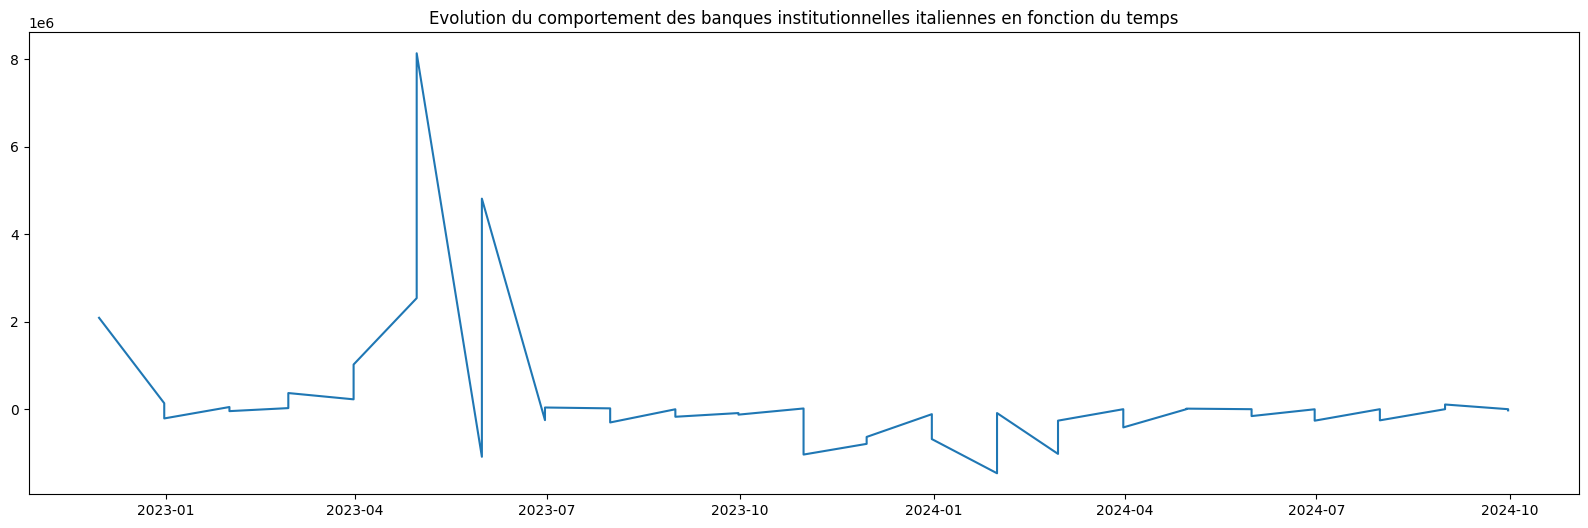

In [122]:
plt.figure(figsize=(20,6))
plt.plot(ex['Date'], ex['Net Inflows MTD (€)'])
plt.title('Evolution du comportement des banques institutionnelles italiennes en fonction du temps')

In [123]:
perf = pd.read_csv('/Users/paulin/Desktop/rothschild 2/data/raw/perf_fonds.csv')
perf = perf[perf['SECURITY_NAME'].str.contains('Euro High Yield')]
perf['ANALYSIS_DATE_FULL'] = pd.to_datetime(perf['ANALYSIS_DATE_FULL'])
perf

,PORTFOLIO_IK_PASSIF,SECURITY_ID,SECURITY_ISIN,SECURITY_NAME,PERFORMANCE_START_DATE,ANALYSIS_DATE_FULL,TWR_NET_CUMULATED,TWR_1DC,TWR_1WC,TWR_1MC,...,TWR_3YR,TWR_5YR,TWR_10YR,TWR_1YAnn,TWR_2YAnn,TWR_3YAnn,TWR_5YAnn,TWR_10YAnn,TWR_BRUT_CUMULATED,REPORTING_CURRENCY
8850,18494,EDRSEHA LX,LU1160363633,EdR Fund Euro High Yield A - EUR,1997-02-14 00:00:00.000,2024-09-30,2.730487,0.024029,0.144349,0.708877,...,3.629755,10.372806,29.329525,11.021986,9.517190,1.194470,1.991278,2.603127,3.788743,EUR
8851,18494,EDRSEHA LX,LU1160363633,EdR Fund Euro High Yield A - EUR,1997-02-14 00:00:00.000,2024-09-27,2.729831,0.050487,0.296436,0.684683,...,3.293703,10.331663,28.886001,11.127133,8.939571,1.085067,1.983681,2.567203,3.787466,EUR
8852,18494,EDRSEHA LX,LU1160363633,EdR Fund Euro High Yield A - EUR,1997-02-14 00:00:00.000,2024-09-26,2.728453,0.069769,0.245825,0.633876,...,3.210838,10.299382,28.820964,10.999920,8.843931,1.056116,1.977719,2.562742,3.785433,EUR
8853,18494,EDRSEHA LX,LU1160363633,EdR Fund Euro High Yield A - EUR,1997-02-14 00:00:00.000,2024-09-25,2.726551,0.016844,0.175933,0.563714,...,3.138880,10.254642,28.496355,10.689178,8.403345,1.033635,1.969454,2.536889,3.782670,EUR
8854,18494,EDRSEHA LX,LU1160363633,EdR Fund Euro High Yield A - EUR,1997-02-14 00:00:00.000,2024-09-24,2.726092,0.105986,0.166305,0.546779,...,3.121511,9.979358,28.335858,10.555742,8.406190,1.028917,1.918540,2.524085,3.781906,EUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48076,62593,EDEHYKE LX,LU1564424882,EdR Fund Euro High Yield K - EUR,2020-12-10 00:00:00.000,2020-12-16,0.998900,NaN,0.090180,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999074,EUR
48077,62593,EDEHYKE LX,LU1564424882,EdR Fund Euro High Yield K - EUR,2020-12-10 00:00:00.000,2020-12-15,0.998300,NaN,0.030060,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.998451,EUR
48078,62593,EDEHYKE LX,LU1564424882,EdR Fund Euro High Yield K - EUR,2020-12-10 00:00:00.000,2020-12-14,0.998500,NaN,0.050100,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.998630,EUR
48079,62593,EDEHYKE LX,LU1564424882,EdR Fund Euro High Yield K - EUR,2020-12-10 00:00:00.000,2020-12-11,0.998000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.998071,EUR


In [124]:
evo_duree = perf.groupby('ANALYSIS_DATE_FULL')[['TWR_NET_CUMULATED','TWR_1WC', 'TWR_1MC', 'TWR_3MC','TWR_6MC','TWR_1YC']].mean().reset_index()
evo_duree

,ANALYSIS_DATE_FULL,TWR_NET_CUMULATED,TWR_1WC,TWR_1MC,TWR_3MC,TWR_6MC,TWR_1YC
0,2020-09-30,1.461488,0.510215,-0.573188,3.016851,12.834206,-2.160592
1,2020-10-01,1.466022,0.824544,0.312757,1.321091,7.567732,-1.580193
2,2020-10-02,1.466523,0.857226,0.345252,1.353894,7.602342,-1.548023
3,2020-10-05,1.470839,0.296770,0.643049,1.654700,7.921874,-1.256085
4,2020-10-06,1.473746,0.492963,0.839917,1.853536,8.132825,-1.062732
...,...,...,...,...,...,...,...
994,2024-09-24,1.625980,0.170040,0.559377,2.568229,3.891707,10.613059
995,2024-09-25,1.626271,0.177753,0.577691,2.568229,3.891707,10.613059
996,2024-09-26,1.627423,0.248085,0.648309,3.016981,4.262167,11.282812
997,2024-09-27,1.628237,0.297903,0.698329,3.016981,4.262167,11.282812


Text(0.5, 1.0, 'Performance du fond')

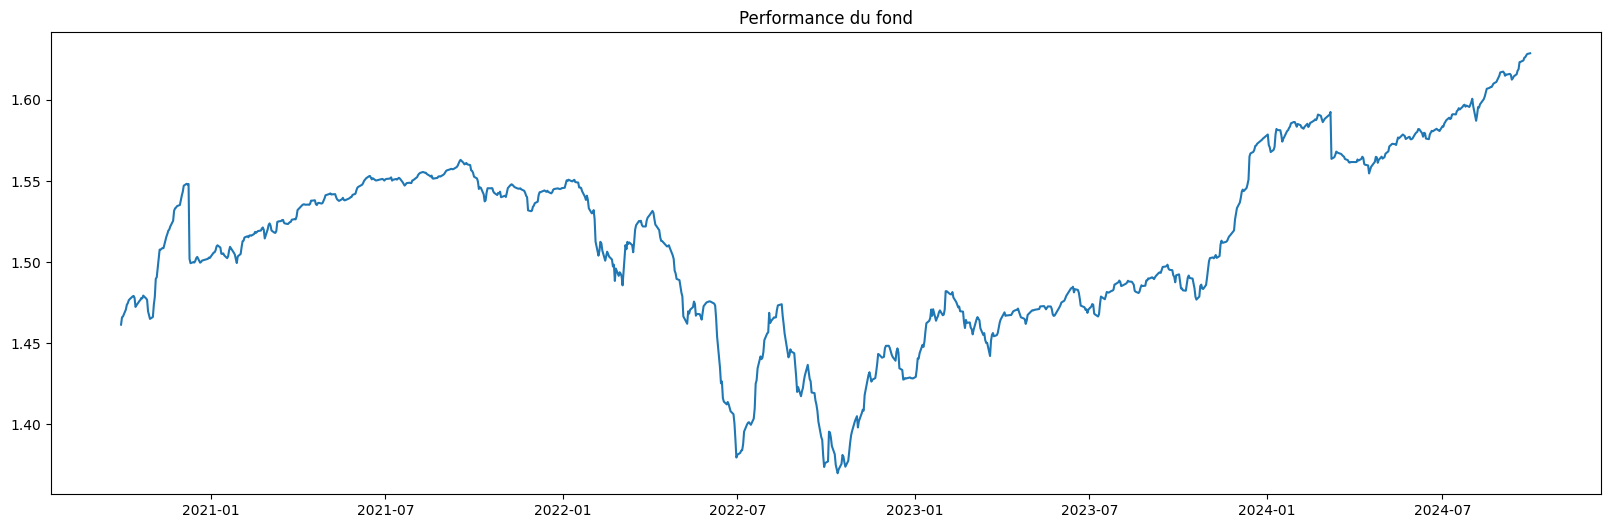

In [131]:
plt.figure(figsize=(20,6))
plt.plot(evo_duree['ANALYSIS_DATE_FULL'], evo_duree['TWR_NET_CUMULATED'])
plt.title("Performance du fond")

Text(0.5, 1.0, "Performance du fond à rendements d'une semaine")

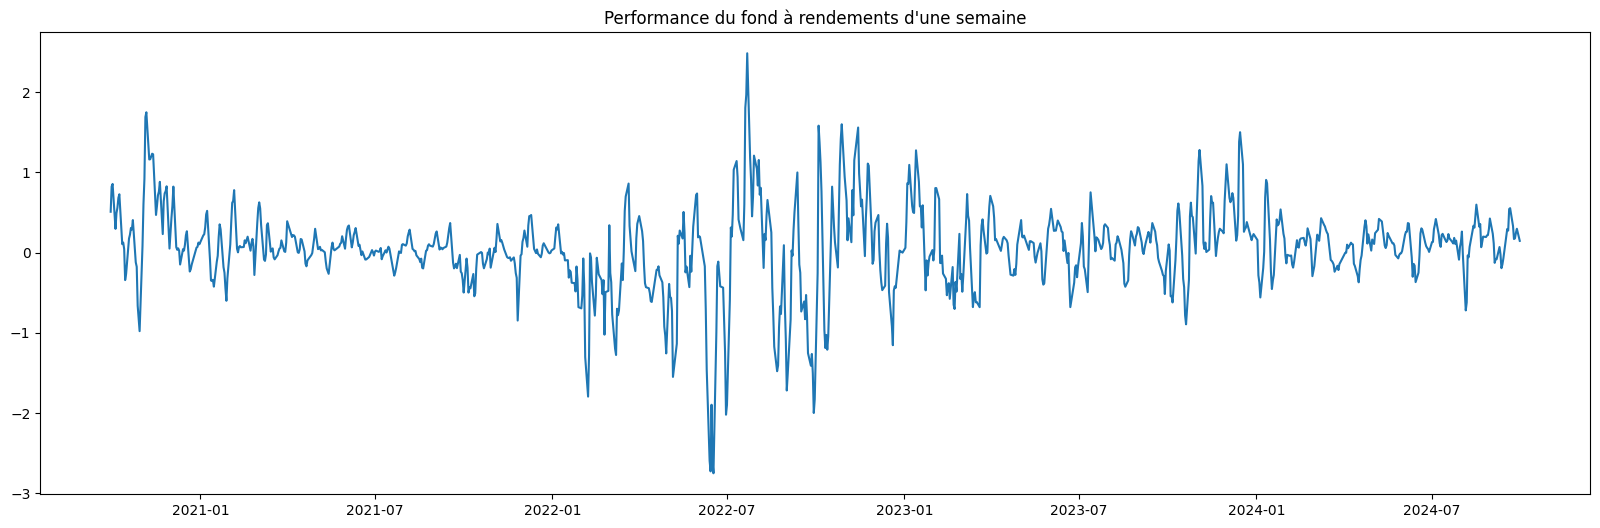

In [125]:
plt.figure(figsize=(20,6))
plt.plot(evo_duree['ANALYSIS_DATE_FULL'], evo_duree['TWR_1WC'])
plt.title("Performance du fond à rendements d'une semaine")

Text(0.5, 1.0, "Performance du fond à rendements d'un mois")

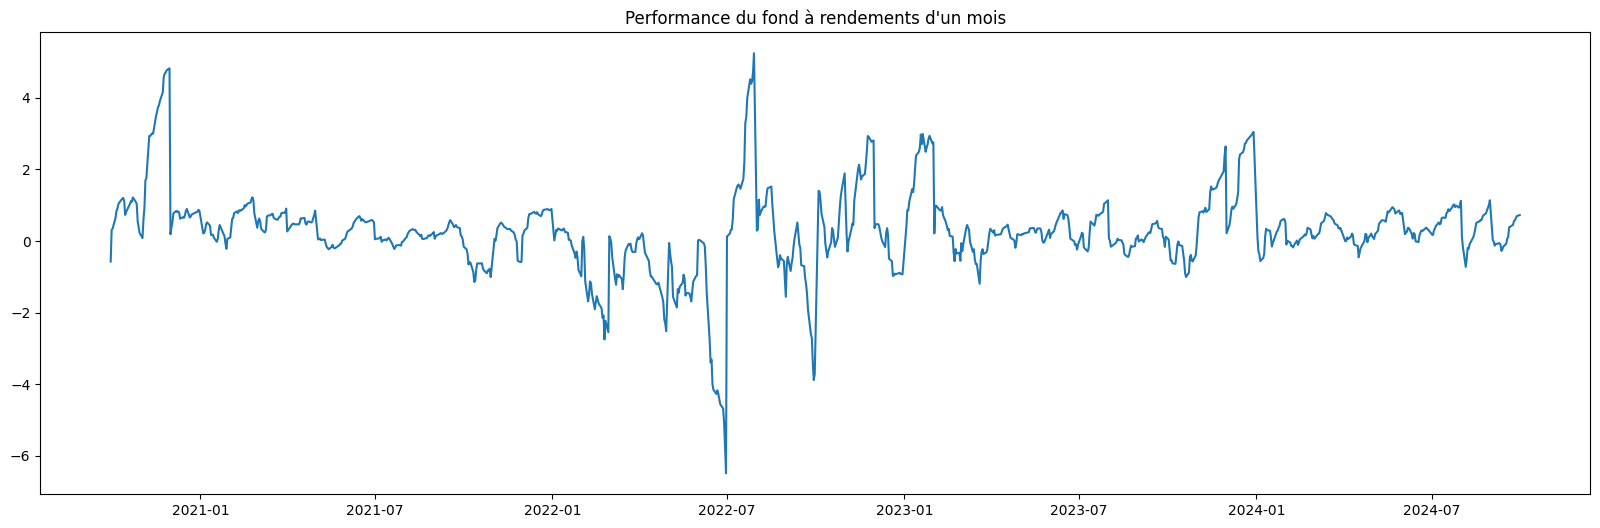

In [126]:
plt.figure(figsize=(20,6))
plt.plot(evo_duree['ANALYSIS_DATE_FULL'], evo_duree['TWR_1MC'])
plt.title("Performance du fond à rendements d'un mois")

Text(0.5, 1.0, 'Performance du fond à rendements de trois mois')

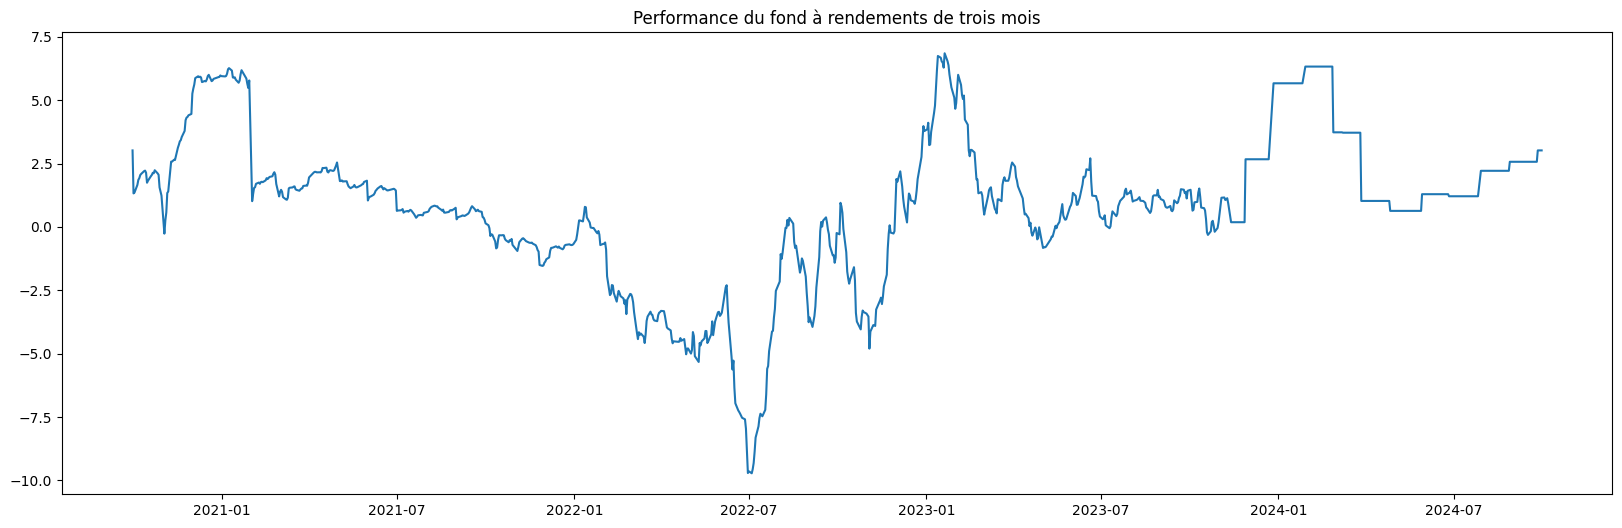

In [127]:
plt.figure(figsize=(20,6))
plt.plot(evo_duree['ANALYSIS_DATE_FULL'], evo_duree['TWR_3MC'])
plt.title("Performance du fond à rendements de trois mois")

Text(0.5, 1.0, 'Performance du fond à rendements de six mois')

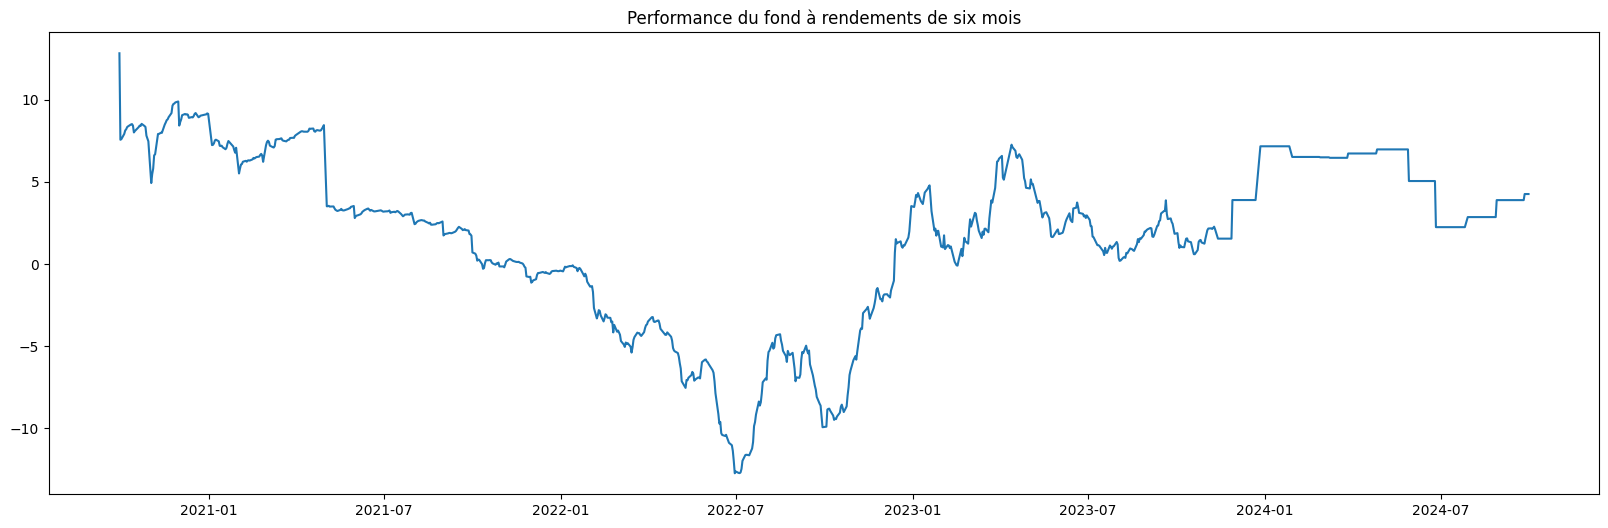

In [128]:
plt.figure(figsize=(20,6))
plt.plot(evo_duree['ANALYSIS_DATE_FULL'], evo_duree['TWR_6MC'])
plt.title("Performance du fond à rendements de six mois")

Text(0.5, 1.0, "Performance du fond à rendements d'un an")

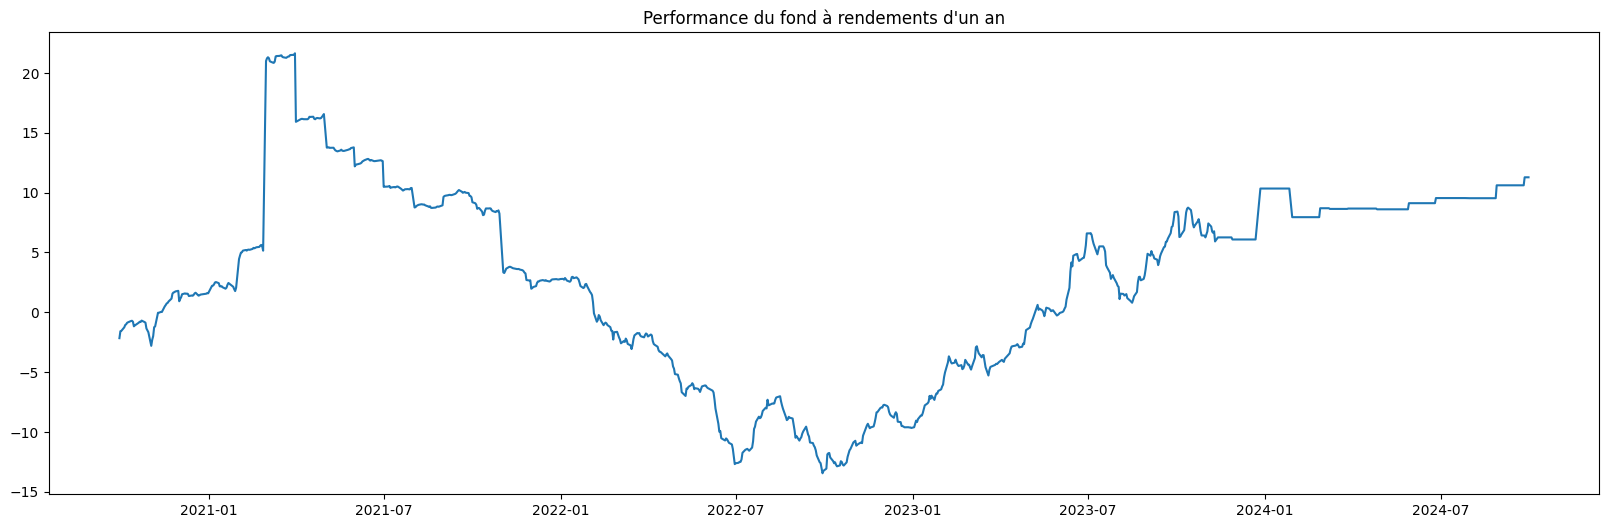

In [129]:
plt.figure(figsize=(20,6))
plt.plot(evo_duree['ANALYSIS_DATE_FULL'], evo_duree['TWR_1YC'])
plt.title("Performance du fond à rendements d'un an")

In [132]:
passif_yield_cleaned

,Owner,Business Relationship,Fund,Share,Share Type,ISIN,Date,AUM (€),Quantity,Net Inflows YTD (€),...,Master Distributor / Fund Buyer (Business Relationship) (Business Relationship),BR Segmentation (Business Relationship) (Business Relationship),Reporting Line (Business Relationship) (Business Relationship),Business Country (Business Relationship) (Business Relationship),Asset Class (Fund) (EdRAM Product),Sub Asset Class (Fund) (EdRAM Product),Year,Quarter,Semester,Segment_Type
0,PBIA (Suisse),EDR MONACO / Managed,EdR Fund Euro High Yield,EdR Fund Euro High Yield A - EUR,A,LU1160363633,2024-09-30 06:00:00,62734961.0,150711,1364232,...,EDMOND DE ROTHSCHILD (MONACO),Bank / EdR Private Banking,EdR Private Banking,MONACO,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q3,2024-09,Bank
1,Nicolas BONARDO,GENERALI VIE (DISTRIBUTION),EdR Fund Euro High Yield,EdR Fund Euro High Yield A - EUR,A,LU1160363633,2024-09-30 06:00:00,27065923.0,65022,-866516,...,GENERALI VIE,Insurance Company / Unit Link,Wholesale,FRANCE,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q3,2024-09,Insurance
2,IFA Partenariat Team France,GENERALI VIE (CGPI),EdR Fund Euro High Yield,EdR Fund Euro High Yield A - EUR,A,LU1160363633,2024-09-30 06:00:00,14573959.0,35012,-466586,...,GENERALI VIE,Insurance Company / Unit Link,IFA,FRANCE,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q3,2024-09,Insurance
3,IFA Partenariat Team France,AXA FRANCE (CGPI),EdR Fund Euro High Yield,EdR Fund Euro High Yield A - EUR,A,LU1160363633,2024-09-30 06:00:00,11547196.0,27740,3363894,...,MFEX FRANCE S.A. (EX. AXELTIS),Insurance Company / Unit Link,IFA,FRANCE,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q3,2024-09,Insurance
4,PBIA,EDR ITALIA PB/ALLFUNDS/Managed,EdR Fund Euro High Yield,EdR Fund Euro High Yield I - EUR,I,LU1160362742,2024-09-30 06:00:00,10597972.0,537,-1348740,...,"ALLFUNDS BANK, S.A.U",Bank / EdR Private Banking,EdR Private Banking,ITALY,Fixed Income,Corporate Debt (excl. Emerging),2024,2024Q3,2024-09,Bank
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8005,Olivier BRUTE DE REMUR,CIC-EST (CAISSE FEDERALE DE CREDIT MUTUEL),EdR Fund Euro High Yield,EdR Fund Euro High Yield A - EUR,A,LU1160363633,2020-09-30 06:00:00,-735.0,-2,0,...,BANQUE FEDERATIVE DU CREDIT MUTUEL,Bank / Retail,Wholesale,FRANCE,Fixed Income,Corporate Debt (excl. Emerging),2020,2020Q3,2020-09,Bank
8006,PBIA (Suisse),EDR SUISSE - CUSTODIAN,EdR Fund Euro High Yield,EdR Fund Euro High Yield B - EUR,B,LU1160363047,2020-09-30 06:00:00,-67626.0,-650,-67256,...,NaN,Bank / EdR Private Banking,EdR Private Banking,SWITZERLAND,Fixed Income,Corporate Debt (excl. Emerging),2020,2020Q3,2020-09,Bank
8007,Edmond de Rothschild Asset Management,CLIENT INCONNU,EdR Fund Euro High Yield,EdR Fund Euro High Yield A - EUR,A,LU1160363633,2020-09-30 06:00:00,-254866.0,-693,0,...,NaN,Unknown,Unknown,UNKNOWN,Fixed Income,Corporate Debt (excl. Emerging),2020,2020Q3,2020-09,Other
8008,Edmond de Rothschild Asset Management,CLIENT INCONNU,EdR Fund Euro High Yield,EdR Fund Euro High Yield I - EUR,I,LU1160362742,2020-09-30 06:00:00,-1107146.0,-65,0,...,NaN,Unknown,Unknown,UNKNOWN,Fixed Income,Corporate Debt (excl. Emerging),2020,2020Q3,2020-09,Other


In [133]:
position_euro_high_yield

,PORTFOLIO_IK,INVENTORY_FUND_NAME,INVENTORY_DATE,SECURITY_IK,SECURITY_ID,SECURITY_NAME,SECURITY_TYPE,SECURITY_TYPE_NAME,INSTRUMENT_TYPE,QUOTATION_CURRENCY,BALANCE_NOMINAL_OR_NUMBER,DIRTY_PRICE,DIRTY_VALUE_TOTAL_PC,DIRTY_VALUE_TOTAL_QC,DWH_EXPO_QC,DWH_EXPO_QC.1,MODEL_PORTFOLIO
0,2181,Edmond de Rothschild Fund Euro High Yield,2024-09-30 00:00:00.000,843773.0,BE6300371273,TNETBB 3 1/2 03/01/28,OBL,Obligation,Bond,EUR,300000.0,99.295337,297886.01,297886.01,297886.01,297886.01,TX_RDT_LID
1,2181,Edmond de Rothschild Fund Euro High Yield,2024-09-30 00:00:00.000,1062876.0,DE000A2YB7B5,SHAEFF 2 7/8 03/26/27,EMTN,EMTN,Bond,EUR,200000.0,100.073822,200147.64,200147.64,200147.64,200147.64,TX_RDT_LID
2,2181,Edmond de Rothschild Fund Euro High Yield,2024-09-30 00:00:00.000,1840102.0,DE000A3823R3,SHAEFF 4 1/2 08/14/26,EMTN,EMTN,Bond,EUR,300000.0,102.040369,306121.11,306121.11,306121.11,306121.11,TX_RDT_LID
3,2181,Edmond de Rothschild Fund Euro High Yield,2024-09-30 00:00:00.000,1840103.0,DE000A3823S1,SHAEFF 4 3/4 08/14/29,EMTN,EMTN,Bond,EUR,1100000.0,101.137973,1112517.70,1112517.70,1112517.70,1112517.70,TX_RDT_LID
4,2181,Edmond de Rothschild Fund Euro High Yield,2024-09-30 00:00:00.000,2002377.0,DE000A383HC1,SHAEFF 4 1/2 03/28/30,EMTN,EMTN,Bond,EUR,1000000.0,101.074385,1010743.85,1010743.85,1010743.85,1010743.85,TX_RDT_LID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
position_euro_high_yield = position_euro_high_yield.dropna()
position_euro_high_yield['QUOTATION_CURRENCY'].value_counts()

QUOTATION_CURRENCY
EUR    297283
USD      9771
GBP      9508
CHF      1001
Name: count, dtype: int64

In [142]:
position_euro_high_yield[position_euro_high_yield['QUOTATION_CURRENCY']=='USD']['BALANCE_NOMINAL_OR_NUMBER'].sum()

np.float64(918888761.21)

In [143]:
position_euro_high_yield[position_euro_high_yield['QUOTATION_CURRENCY']=='EUR']['BALANCE_NOMINAL_OR_NUMBER'].sum()

np.float64(176526764309.57)

In [144]:
position_euro_high_yield[position_euro_high_yield['QUOTATION_CURRENCY']=='EUR']['BALANCE_NOMINAL_OR_NUMBER'].sum()/position_euro_high_yield[position_euro_high_yield['QUOTATION_CURRENCY']=='USD']['BALANCE_NOMINAL_OR_NUMBER'].sum()

np.float64(192.10896004116773)